## To the reviewer
Hi:), My name is Yoad,<br> 
I would like to thank you for taking the time to go over my project.<br>
I hope that you'll find it interesting and clear, and I'm looking forward to read your comments.

Hello, Yoad!
My name is Olga. I'm happy to reviewing your project today.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

<b>Please don't remove my comments :)</b>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Yoad, thank you for sending your project. Your project looks great! You did such a good job!
       
I especially liked the syntax and code style of your work. It was very detailed and laconic at the same time. Thank you for your conclusions. I'm really impressed. You described all. Excellent!
    
Glad to say that your project has been accepted.
    
If you have questions, please, write them here. I try to help you. If you haven't any questions, just send me your project again and I will accept it. :)    
</div>


<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Hello Yoad!
    
Keep up the good work, and good luck on the next sprint! :)
</div>

----

# Research on Passenger's Ride Patterns in Chicago.

Zuber is the next generation ride-sharing platform,<br>
As a promising start-up, Zuber chose Chicago as its launch location.<br>
 
In order for Zuber to have a successful lunch, we need to know the patterns and behaviours of passengers in Chicago's neighborhoods,<br>
and if and how much the weather affects them.

## Decription of the data
##### The `project_sql_result_01.csv`  data:
 * `company_name` — Taxi company name.
 * `trips_amount` — The number of rides for each taxi company on November 15-16, 2017.
 
##### The `project_sql_result_04.csv`  data:
 * `dropoff_location_name` — Chicago neighborhoods where rides ended.
 * `average_trips` — The average number of rides that ended in each neighborhood in November 2017.
 
##### The `project_sql_result_07.csv`  data: 
 * `start_ts` — Pickup date and time.
 * `weather_conditions` — Weather conditions at the moment the ride started.
 * `duration_seconds` — Ride duration in seconds.

----

## Tables Of Contents 
<a class="anchor" id="table_of_contents"></a><br>
- [**First Look at The Data**](#chapter1)<br>
  - [Taxi data](#chapter2)<br>
  - [Neighborhoods data](#chapter3)<br>
  - [Airport Trips](#chapter4)<br>
- [**Data Preprocessing**](#chapter5)<br>
  - [Duplicated Values](#chapter6)<br>
  - [Changing Data Types](#chapter7)<br>
- [**Analyzing The Data**](#chapter8)<br>
   - [The Top 10 neighborhoods](#chapter9)<br>
   - [Taxi compenies and Number of Rides](#chapter10)<br>
   - [Top 10 Neighborhoods and Number of Rides](#chapter11)<br>
- [**Hypotheses Testing**](#chapter12)<br>
   - [Average Duration of Rides to O'Hare Airport](#chapter13)<br>
- [**Overall Conclusion**](#chapter14)<br>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great start! We have a very detailed introduction and contents. It help us to understand the subject and goals. Also we can navigate easily in a project. :) 
</div>


----

## First Look at The Data 
<a class="anchor" id="chapter1"></a>
[Go back to the Table of Contents](#table_of_contents)

### Please Note: 
**There are some libraries that are not updated on the platform, particularly Matplotlib and Seaborn.       
In order for the code to run properly, remove the # sign in the following commands and execute them, then restart the kernel.
Thank you.**

In [1]:
# !pip install numpy --upgrade --no-warn-script-location

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.7 MB 21.7 MB/s eta 0:00:01


In [2]:
# !pip install pandas --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 1.7 MB/s eta 0:00:01


In [3]:
# !pip install matplotlib --upgrade 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.7 MB/s eta 0:00:01


In [4]:
# !pip install seaborn --upgrade 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.3 MB/s eta 0:00:01


In [5]:
# Importing pandas libarary.
import pandas as pd

# Importing NumPy library.
import numpy as np

# Importing matplotlib libarary.
import matplotlib.pyplot as plt

# Importing seaborn library.
import seaborn as sns

# Importing reduce function.
from functools import reduce

# Importaing satistics library.
from scipy import stats as st


In [6]:
# By using try-except method, the data can load on the platform,
# as well as my local computer.

try:
    # Loading the data in the .csv files into a variable (locally)
    taxi = pd.read_csv('project_sql_result_01.csv')
    nhoods = pd.read_csv('project_sql_result_04.csv')
    airport_trips = pd.read_csv('project_sql_result_07.csv')
    
except:   
    # Loading the data in the .csv files into a variable (platform)
    taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
    nhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
    airport_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for your comment about installation of libraries. Import libraries at the beginning help us to set up working environment and try/except is a great decision!
</div>

### Taxi data
<a class="anchor" id="chapter2"></a>
[Go back to the Table of Contents](#table_of_contents)

The first thing we need to do is look at the entire data set and see if there are any missing values, as well as the types of data.

In [7]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- We can see that **the data does not contain any missing values.**
- We might want to **change 'trips_amount' to int32** to save memory.

Printing 10 rows randomly from the dataset to examine the data.

In [8]:
taxi.sample(10)

,company_name,trips_amount
43,2809 - 95474 C & D Cab Co Inc.,29
5,Chicago Carriage Cab Corp,9181
51,4623 - 27290 Jay Kim,15
2,Medallion Leasing,10367
7,Sun Taxi,7701
54,2192 - 73487 Zeymane Corp,14
3,Yellow Cab,9888
47,4615 - 83503 Tyrone Henderson,21
60,2733 - 74600 Benny Jona,7
42,1085 - 72312 N and W Cab Co,29


Using describe() we can now get even more detailed information about our data.


In [9]:
taxi.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


- Our data contains information on **64 taxi companies** in Chicago.
- The **average number of trips is 2145** for the different companies, which is impressive for a 2 day period, and we should review all the data to make sure everything is accurate.
- There is a big difference in the number of trips in the data, as ***the standard deviation is really high!**
- The **minimum number of trips is 2**, and the **maximum is around 20,000.** Could there be such dramatic difference between companies? one possible explanation is that these companies use an app service that is similar to GetTaxi or YanGo, or maybe our data is corrupted in some way🤔.
- **The mean is also more than 10 times higher than the median**, so something must be going on.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! We have basic information about our first dataset. You write a very detailed description. Thank you!
 
Also you designate problems with data. Very good!
</div>

#### Visualizing the distribution of trips amount in taxi data.

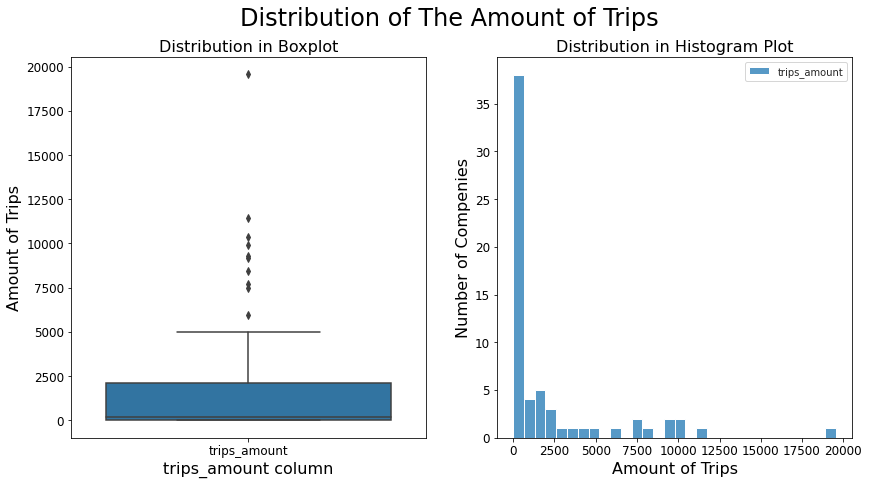

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig.suptitle('Distribution of The Amount of Trips', size=24)
sns.set_style("whitegrid")

sns.boxplot(ax=axes[0],data=taxi);
axes[0].set_title( 'Distribution in Boxplot' , size = 16 )
axes[0].set_xlabel('trips_amount column', size=16);
axes[0].set_ylabel('Amount of Trips', size=16);
axes[0].tick_params(axis='both', which='major', labelsize=12)

sns.histplot(ax=axes[1],data=taxi,bins=30);
axes[1].set_title( 'Distribution in Histogram Plot' , size = 16 )
axes[1].set_xlabel('Amount of Trips', size=16);
axes[1].set_ylabel('Number of Compenies', size=16);
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

- We can see **very high outliers in our data.**
- The data is **highly skewed to the right.**
- We can see that **around half of the companies** in our data **falls between 0 trips (actually 2 is the minimum) and somewhere around 1,000**, and a drastic decline in the number of companies as we go up in the number of trips.

#### Conclusion

At first glance, it is evident that,
- We see very high outliers in our amount of trips per company.
- Around half of the companies in out data falls between 2 (the minimum) and around 1,000 trips.
- The data is highly skewed to the right.
- We might want to change the 'trip_amount' column to int32 to save memory.
- There are no missing values in the data

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great visualisation and conclusion! Yes, here we have high outliers, but it is a taxi and it can be real. :) 
</div>

### Neighborhoods data
<a class="anchor" id="chapter3"></a>
[Go back to the Table of Contents](#table_of_contents)

The first thing we need to do is look at the entire data set and see if there are any missing values, as well as the types of data.

In [11]:
nhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- We can see that **the data does not contain any missing values**.
- We might want to **change 'average_trips' to int32** because we don't have half of a trip (in theory) and to save memory.

Printing 10 rows randomly from the dataset to examine the data.

In [12]:
nhoods.sample(10)

,dropoff_location_name,average_trips
79,Fuller Park,8.166667
57,Hermosa,27.566667
11,East Village,1212.066667
38,Armour Square,77.033333
28,Wicker Park,182.600000
10,Lincoln Park,1246.533333
80,West Lawn,7.733333
68,Clearing,14.500000
82,South Deering,7.500000
84,West Pullman,6.466667


Using describe() we can now get even more detailed information about our data.


In [13]:
nhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


- Our data contains **information on 94 neighborhoods Chicago.**
- The **average number of average trips per neighborhood is around 600**, which is impressive for a 2 day period.
- There is a big difference in the number of trips in the data, as **the standard deviation is really high!**
- The **minimum number of average trips is 1.8** which correspond with our previous data, and the **maximum is around 11,000**. Here too we can see that there is something with the data and the two tables are connected around this issue.
- **The mean is also more than 30 times higher than the median(!!!),** indicating a highly skew to the right.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
The same great detailed description. Very good that you find outliers here.</div>

#### Visualizing the distribution of average trips amount to different neighborhoods.

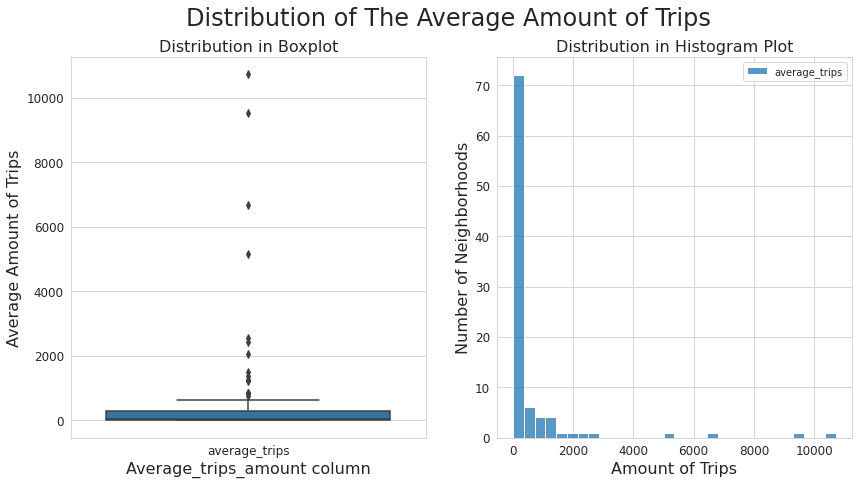

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig.suptitle('Distribution of The Average Amount of Trips', size=24)
sns.set_style("whitegrid")

sns.boxplot(ax=axes[0],data=nhoods);
axes[0].set_title( 'Distribution in Boxplot' , size = 16 )
axes[0].set_xlabel('Average_trips_amount column', size=16);
axes[0].set_ylabel('Average Amount of Trips', size=16);
axes[0].tick_params(axis='both', which='major', labelsize=12)

sns.histplot(ax=axes[1],data=nhoods,bins=30);
axes[1].set_title( 'Distribution in Histogram Plot' , size = 16 )
axes[1].set_xlabel('Amount of Trips', size=16);
axes[1].set_ylabel('Number of Neighborhoods', size=16);
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

- We can see **very high outliers in our data.** just as we've seen before.
- The data is **highly skewed to the right.**
- We can see that **more than 70 of the neighborhoods** in our data **falls between 2 average trips (actually 1.8 is the minimum) and somewhere around 350**, and a drastic decline in the number of neighborhoods as we go up in the average number of trips.

#### Conclusion

At first glance, it is evident that,
- We see very high outliers in our amount of average trips per neighborhood.
- More than 70 of the neighborhoods in our data falls between 2 ( 1.8 is the minimum) and around 350 average trips.
- The data is highly skewed to the right.
- We might want to change the 'average_trip_amount' column to int32 because we don't have half of a trip (in theory) and to save memory.
- There are no missing values in the data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
So, here we have similar results. Our data is prepared good and outliries are their feature. </div>

### Airport Trips
<a class="anchor" id="chapter4"></a>
[Go back to the Table of Contents](#table_of_contents)

The first thing we need to do is look at the entire data set and see if there are any missing values, as well as the types of data.

In [15]:
airport_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- We can see that **the data does not contain any missing values**.
- We need to **change 'start_ts' to date-time** in order to be able to work with it.
- We need to **change 'duration_seconds' to int32** because the column is in seconds (whole) and to save memory.

Printing 10 rows randomly from the dataset to examine the data.

In [16]:
airport_trips.sample(10)

,start_ts,weather_conditions,duration_seconds
484,2017-11-04 12:00:00,Good,3000.0
81,2017-11-11 06:00:00,Good,1346.0
891,2017-11-18 06:00:00,Good,1335.0
565,2017-11-04 04:00:00,Good,1440.0
1025,2017-11-04 07:00:00,Good,1380.0
231,2017-11-04 07:00:00,Good,1200.0
1005,2017-11-04 14:00:00,Good,2704.0
292,2017-11-18 06:00:00,Good,1680.0
742,2017-11-18 12:00:00,Bad,2340.0
378,2017-11-04 08:00:00,Good,1686.0


Using describe() we can now get even more detailed information about our data.


In [17]:
airport_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


- Our data contains **information on 1068 trips to the Airport.**
- The **average duration of a trip is around 2071 seconds**, which is 34.5 minutes.
- There is a big difference in the number of trips in the data, as **the standard deviation is really high!**
- The **minimum duration of a trip is 0** which indicates that we might have some data that we'll need to filter, as these values will only skew our results.
- **The mean is not that high compared to the median,** indicating a more uniformally distributed data.

Using describe() and including object types.


In [18]:
airport_trips.describe(include=object).T

,count,unique,top,freq
start_ts,1068,81,2017-11-11 10:00:00,48
weather_conditions,1068,2,Good,888


- The **most frequent date and time is '2017-11-11 10:00:00'.**
- There are **81 unique date and time stamps**.
- The **most frequent weather condition is 'Good'.**
- Only **180 entries** of the data are **labeled with 'Bad' weather.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
I like your conclusions. Very detailed! :) </div>

#### Visualizing the distribution of average trips amount to different neighborhoods.

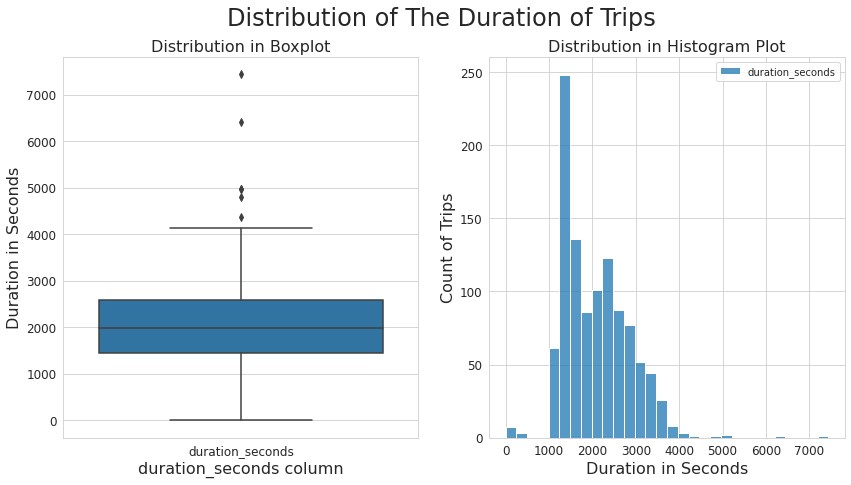

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig.suptitle('Distribution of The Duration of Trips', size=24)
sns.set_style("whitegrid")

sns.boxplot(ax=axes[0],data=airport_trips);
axes[0].set_title( 'Distribution in Boxplot' , size = 16 )
axes[0].set_xlabel('duration_seconds column', size=16);
axes[0].set_ylabel('Duration in Seconds', size=16);
axes[0].tick_params(axis='both', which='major', labelsize=12)

sns.histplot(ax=axes[1],data=airport_trips,bins=30);
axes[1].set_title( 'Distribution in Histogram Plot' , size = 16 )
axes[1].set_xlabel('Duration in Seconds', size=16);
axes[1].set_ylabel('Count of Trips', size=16);
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

- We can see **some high outliers in our data** above the 4,000 seconds mark.
- Although it doesn't show in the boxplot we have some lower outliers (at least we should consider them as such), trips that lasted 0 seconds.
- The data is **more uniformly distributed.**
- We can see that **almost 250 trips** in our data **had a duration of about 1,250 seconds**, which are 20 minutes long.
- We can see a drastic decline in the number of trips above 2,500 seconds of duration.

Looking at rows where duration is 0.

In [20]:
airport_trips[airport_trips['duration_seconds'] == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


Excluding rows where duration is 0 from the data set.

In [21]:
airport_trips = airport_trips[airport_trips['duration_seconds'] != 0]

### Conclusion

At first glance, it is evident that,
- We see some high outliers in terms of duration, as well as trips that lasted 0 seconds.
- The most freqent trip duration is around 1,500 seconds (20 minutes).
- The data is more uniformly distributed than the other data sets we have.
- Most of the trips log with Good weather condition, only 180 with Bad.
- We need to change 'start_ts' to date-time in order to be able to work with it.
- We need to change 'duration_seconds' to int32 because the column is in seconds (whole) and to save memory.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Finally we have data more uniformly distributed! 

We have the same problems with datatypes here and know how to solve them. Let's start!</div>

----

## Data Preprocessing
<a class="anchor" id="chapter5"></a>
[Go back to the Table of Contents](#table_of_contents)

### Duplicated Values
<a class="anchor" id="chapter6"></a>
[Go back to the Table of Contents](#table_of_contents)

Looking for duplicated rows in the data sets.

In [22]:
print('Number of duplicated rows in the data:', taxi.duplicated().sum())

Number of duplicated rows in the data: 0


In [23]:
print('Number of duplicated rows in the data:', nhoods.duplicated().sum())

Number of duplicated rows in the data: 0


In [24]:
print('Number of duplicated rows in the data:', airport_trips.duplicated().sum())

Number of duplicated rows in the data: 197


In [25]:
airport_trips[airport_trips.duplicated()].sample(10)

,start_ts,weather_conditions,duration_seconds
563,2017-11-11 06:00:00,Good,1200.0
541,2017-11-04 05:00:00,Good,1200.0
697,2017-11-11 10:00:00,Good,1560.0
1052,2017-11-18 15:00:00,Good,3240.0
347,2017-11-11 17:00:00,Good,2460.0
910,2017-11-04 12:00:00,Good,2520.0
480,2017-11-11 11:00:00,Good,1380.0
666,2017-11-11 10:00:00,Good,1260.0
948,2017-11-11 06:00:00,Good,1260.0
359,2017-11-18 16:00:00,Bad,2820.0


Although we see duplicated rows in the data, it seems logical to have more than one trip in a given time to the airport, moreover, that the time stamp could be rounded to the hour as we see, and if we have a few trips to the airport less than an hour apart it is logical that the trafic condition will allow for the same length of trip.

#### Conclusion


No duplicated rows.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great!. </div>

### Changing Data Types
<a class="anchor" id="chapter7"></a>
[Go back to the Table of Contents](#table_of_contents)

There are two changes that we wanted to make in order to easily work with the data:<br>
- Change 'trips_amount' to int32 in taxi.
- Change 'average_trips' to int32 in nhoods.
- Change 'start_ts' to datetime in airport_trips.
- Change 'duration_seconds' to int32.

##### Changing 'trips_amount' to int32 in taxi.

In [26]:
taxi['trips_amount'] = taxi['trips_amount'].astype('int32')

In [27]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 896.0+ bytes


Success.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! </div>

##### Changing 'average_trips' to int32 in nhoods.

In [28]:
nhoods['average_trips'] = nhoods['average_trips'].astype('int32')

In [29]:
nhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
OK. </div>

##### Changing data types in airport_trips.

Changing 'start_ts' to datetime in airport_trips.

In [30]:
airport_trips['start_ts'] = pd.to_datetime(airport_trips['start_ts'], format='%Y.%m.%d %H:%M:%S')

Changing 'duration_seconds' to int32

In [31]:
airport_trips['duration_seconds'] = airport_trips['duration_seconds'].astype('int32')

In [32]:
airport_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 29.0+ KB


Success.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
:)

</div>

### Conclusion


Successfully converted 'trips_amount' and 'average_trips' to integer(32).<br>
There are no duplicates and missing values in our data sets.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great step. Now we studied our datasets and can start to analyze. Let's go! </div>

----

## Analyzing The Data
<a class="anchor" id="chapter8"></a>
[Go back to the Table of Contents](#table_of_contents)

### The Top 10 neighborhoods
<a class="anchor" id="chapter9"></a>
[Go back to the Table of Contents](#table_of_contents)

In [33]:
top_10_n = nhoods.sort_values(by=['average_trips'], ascending=False).head(10)
top_10_n

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


As we can see these are the 10 neighborhoods with the most average droop-offs of passengers.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
It would be informative to plot a graph here. 

Yes, we can read table. But clients prefer to read a conclusions after graphs for better understanding. 

Our clients may be non analysts, because of it we need visualisation. :) 
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a><br>
    I completly agree and thank you for your input.<br>
    I have the exact graph that you refer to just below the next graph.<br>
    Maybe it will be beneficial to put it here also.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment.V.2.</b> <a class="tocSkip"></a>
    
Yes, I saw your graph. But those are different questions. Also we plot a graph (mostly) for clients. They like graphs anywhere. :) 
</div>

### Taxi compenies and Number of Rides
<a class="anchor" id="chapter10"></a>
[Go back to the Table of Contents](#table_of_contents)

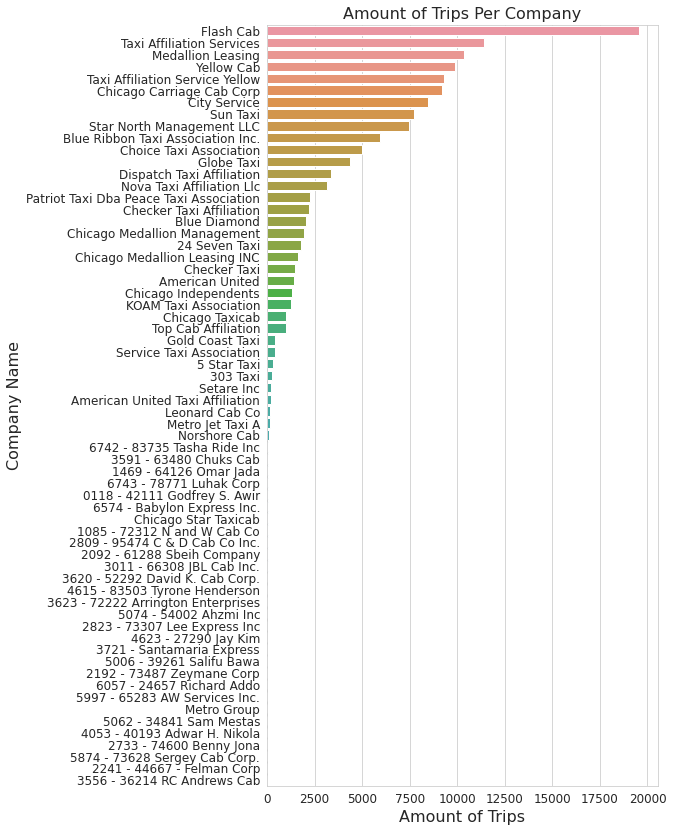

In [34]:
fig, ax = plt.subplots(figsize=(7,14))
sns.set_style("whitegrid")

sns.barplot(x= taxi['trips_amount'], y=taxi['company_name']);
ax.set_title( 'Amount of Trips Per Company' , size = 16 )
ax.set_ylabel('Company Name', size=16);
#plt.xticks(rotation=90)
ax.set_xlabel('Amount of Trips', size=16);
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Conclusion<br>

- Compared to the other companies, "Flash Cab" has the most trips by a large margin.
- We see a gradual decline from "Taxi Affiliation Service Yellow" to "Star North Management LLC" that gets steeper after the latter.
- As we can see, some companies, such as "Gold Coast Taxi" and below, do not make as many trips as others.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good graph! Thank you for sorted values for graph. It makes it more understandble.
    
Yes, flash cab is a best here. Perhaps, because of Flash or number of trips. :)


</div>

### Top 10 Neighborhoods and Number of Rides
<a class="anchor" id="chapter11"></a>
[Go back to the Table of Contents](#table_of_contents)

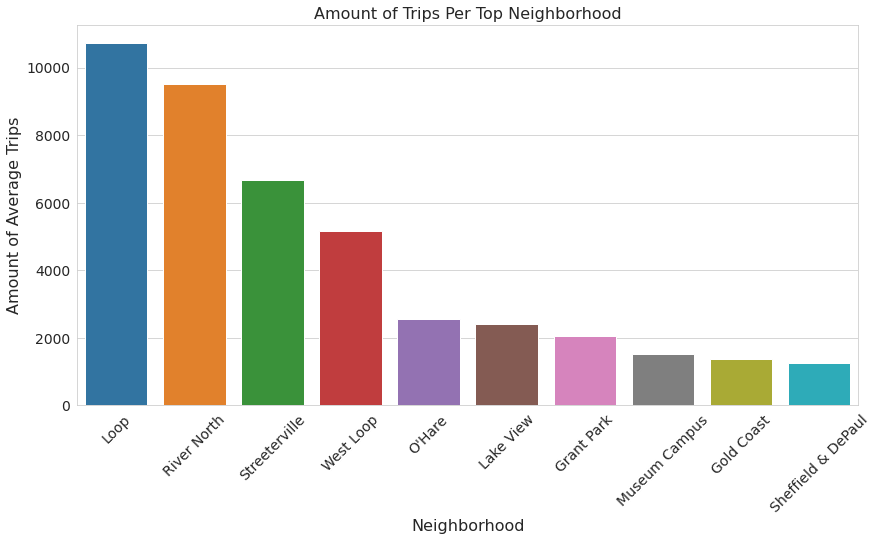

In [35]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set_style("whitegrid")

sns.barplot(x= top_10_n['dropoff_location_name'], y=top_10_n['average_trips'],);
ax.set_title( 'Amount of Trips Per Top Neighborhood' , size = 16 )
ax.set_xlabel('Neighborhood', size=16);
plt.xticks(rotation=45)
ax.set_ylabel('Amount of Average Trips', size=16);
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

#### Conclusion<br>

- Loop and River North have the most trips compared to the other neighborhoods.
- From Loop to West Loop, we see a gradual decline that becomes steeper afterward.
- O'Hare to Sheffield & DePaul are fairly small changes, and they have a much lower number of trips than the leading neighborhoods.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for title and axis labels. Such details help to understand graphs clearly. 
    
Great comments for neighborhoods. Perhaps, those neighborhoods are in city center or they have some popular places. :)

</div>

## Testing Hypotheses
<a class="anchor" id="chapter12"></a>
[Go back to the Table of Contents](#table_of_contents)

### Average Duration of Rides to O'Hare Airport
<a class="anchor" id="chapter13"></a>
[Go back to the Table of Contents](#table_of_contents)

**H0**: The average duration of rides from Loop to O'Hare International Airport do not change on rainy Saturdays.<br>
**H1**: The average duration of rides from Loop to O'Hare International Airport changes on rainy Saturdays.<br>
Our measure will be a null-test using a t-test for statistical insignificant difference, our level of sagnificance (alpha) be set to 0.05 as it is standard.

In [36]:
good_trip = airport_trips.query('weather_conditions == "Good"')
bad_trip = airport_trips.query('weather_conditions == "Bad"')

We'll run the t-test.

In [37]:
alpha = 0.05  # critical statistical significance level.

good_trip_d = good_trip['duration_seconds'] # Data for good weather trips.
bad_trip_d = bad_trip['duration_seconds'] # Data for bad weather trips.

results = st.ttest_ind(good_trip_d, 
                       bad_trip_d) # Performing t-test on both data sets.

print('p-value: ', results.pvalue)
print()
if results.pvalue < alpha: # if the p-value is less than alpha, we reject the hypothesis.
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.3318772977743245e-11

We reject the null hypothesis


#### **Conclusion** <br>


Although our test does not prove our alternative hypothesis(H1),<br>
It suggests that statistically speaking there might be a significant difference between our mean of trip duration for both weather conditions.<br>
Thus, we can exclude that there is no difference in trip duration on rainy days.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent step!
  
Very good formulation of hypotheses, right alpha and test.
    
Yes, you are right. The weather has not an effect on the demand for a taxi ride in general.
    
It was non-expected, but now we have confirmation from our test!

</div>

----

## Overall Conclusion
<a class="anchor" id="chapter14"></a>
[Go back to the Table of Contents](#table_of_contents)

Zuber is the next generation ride-sharing platform,<br>
As a promising start-up, Zuber chose Chicago as its launch location.<br>

In order for Zuber to have a successful lunch, we need to know the patterns and behaviours of passengers in Chicago's neighborhoods,<br>
and if and how much the weather affects them.<br>


With a variety of techniques and methods, we collected data for passengers trips in Chicago and extracted the valuable information we needed to help Zuber make their lunch a success.<br>

According to our research, **Zuber's biggest competitors are probably Flash Cab, Taxi Affiliation Service Yellow, and Medallion Leasing to name just a few**. (In the graph above you can see the names of the leading companies.)<br>

**In order to determine where Zuber can gain a competitive advantage over the other players, we must continue to look into their strengths and weaknesses.**<br>

Moreover, we analyzed the number of passenger trips across Chicago's neighborhoods, which shows that **Loop and River North have the most trips compared to the other neighborhoods. <br>These are the areas where Zuber should initially pilot their services so that they can reach the most customers.**<br>

We ran a statistical significance test to see if rainy days and bad weather affect the trip duration to Chicago airport and in general.<br>
**We found a significant effect of weather on trip duration, although we cannot say for sure, as our data was limited. Zuber should take our findings with a grain of salt.**<br>

Nonetheless, it will still be better if Zuber launches its pilot on a good weather day to raise the chances of adapting, while at the same time it should act as an excuse to delay the launch.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for such big conclusion. We add information about the most popular taxi and neighborhoods and test results. Very good.
    
Great recommendation!

</div>

----